## Easy Ensemble Classifier

This notebook is used to train a boosting classifier on the dataset. The train and test data set are directly loaded with pickle. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
from imblearn.ensemble import EasyEnsembleClassifier

import sys
sys.path.append('../Library')

import breedManip as breedManip
import dataProcessing as dataProcessing
import breeds as breeds
import splitData as splitData

import importlib
importlib.reload(splitData)

2023-07-06 16:12:24.855619: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 16:12:24.950967: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 16:12:26.302218: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<module 'splitData' from '/mnt/remote/workspaces/magali.egger/TBproject/Travail_Bachelor/ClassificationSimple/../Library/splitData.py'>

#### Preparation of the data

In [2]:
# get the df_train and df_test with pickle
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/df_train.pkl', 'rb') as f:
    df_train = pickle.load(f)

with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/df_test.pkl', 'rb') as f:
    df_test = pickle.load(f)

In [3]:
print(df_test['mouse'].unique())

['09003' '043S5' '06403' '06110' '10301' '02901' '03205' '09509' '29T06'
 '09806' 'BDF06' '04508' '08404' '08108' '00506' '07007' 'DBA13' '04901'
 '06603' '51G10' '09708' '10009' 'DBF01' 'BL6V3' '04806' '08314' '05502'
 '05602' '06505' '07303' '08911' '07106' '04405' '07502' '06306' '08706'
 '06707' '05002' '09604']


In [4]:
df_train = df_train.drop(columns=['mouse'])
df_test = df_test.drop(columns=['mouse'])

df_train = df_train.drop(columns=['breed'])
df_test = df_test.drop(columns=['breed'])

In [5]:
x_train, x_test, y_train, y_test, le = splitData.encode_scale_data(df_train, df_test, 13, cat_matrix=True)

#### Training of the easy ensemble classifier

In [11]:
eec = EasyEnsembleClassifier(n_jobs=-1, random_state=13)
y_train_raw = np.argmax(y_train, axis=1)
eec.fit(x_train, y_train_raw)
y_pred = eec.predict(x_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [13]:
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/rfc_easy_ensemble.pkl', 'wb') as f:
    pickle.dump(eec, f)

[[261157  15294   5186]
 [  2254  36619    954]
 [ 17468  22098 401674]]


              precision    recall  f1-score   support

           n       0.93      0.93      0.93    281637
           r       0.49      0.92      0.64     39827
           w       0.98      0.91      0.95    441240

    accuracy                           0.92    762704
   macro avg       0.80      0.92      0.84    762704
weighted avg       0.94      0.92      0.92    762704



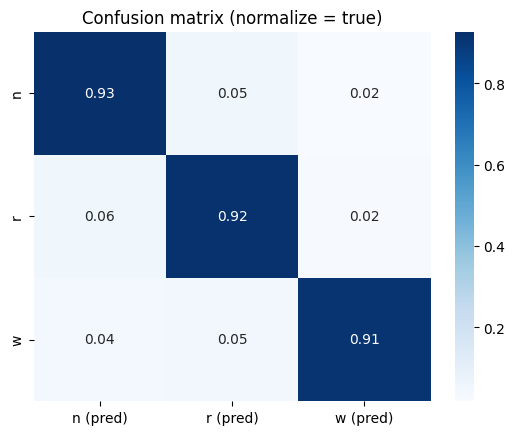

In [15]:

from sklearn.metrics import classification_report, confusion_matrix
pred = y_pred
test = np.argmax(y_test, axis=1)

# plot the confusion matrix between predictions of the model and real values

cm = np.array(confusion_matrix(test, pred))
print(cm)

cm = np.array(confusion_matrix(test, pred, normalize='true')) # normalize = 'true' or 'pred'
confusion = pd.DataFrame(cm, index=le.classes_, columns=le.classes_ + ' (pred)')


print(classification_report(test, pred, target_names=le.classes_, zero_division=0))

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='.2f')
plt.title(f'Confusion matrix (normalize = true)')
plt.show()